In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introducción

En esta práctica vamos a trabajar con un dataset sintético. Vamos a implementar una regresión lineal de dos maneras distintas:

1. Implementando el descenso del gradiente a mano.
2. Usando la librería `scikit-learn`.

Finalmente, vamos a comparar los resultados.

In [3]:
#!pip install scikit-learn

In [4]:
import scikit-learn 

SyntaxError: invalid syntax (2453351724.py, line 1)

# Generación del dataset

Generamos un dataset sintético, que consta de dos atributos y de un target. Para ello:

- Especificamos el número de ejemplos del dataset a crear.
- Creamos valores aleatorios para ambos atributos, siguiendo una distribución normal
- Creamos los valore del target, tomando valores a lo largo de una recta a la que introducimos ruido.

In [5]:
#Fijamos seed para controlar la aleatoriedad.
np.random.seed(42)

N = 200

# Dos variables explicativas => generame random con una distribucion entre -3 y 3
x1 = np.random.uniform(-3, 3, N) 
x2 = np.random.uniform(-3, 3, N)

# Parámetros verdaderos
w1_true = 2.0
w2_true = -1.5
b_true = 4.0

# Generar respuesta con algo de ruido 
noise = np.random.normal(0, 1, N)
y = w1_true * x1 + w2_true * x2 + b_true + noise # se le añade un ruido para que no sea una recta 


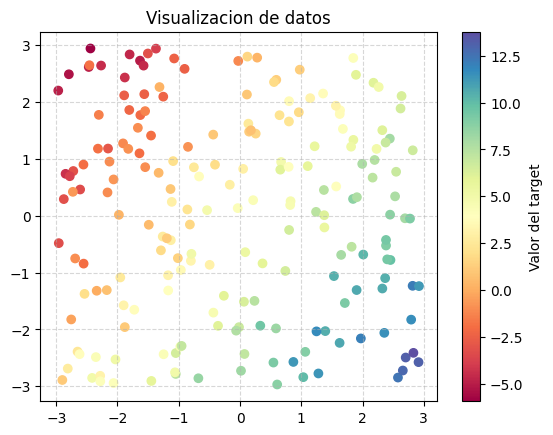

In [6]:
## VISUALIZA LOS DATOS
# Usa un eje para cada uno de los atributos
# Utiliza una escala de color para representar el target.
plt.scatter(x1, x2, c=y, cmap='Spectral')
plt.colorbar(label='Valor del target')
plt.title('Visualizacion de datos')
plt.grid(True, linestyle='--', alpha=0.5)

# 1. Implementación manual

Comenzamos inicializando los parámetros $w_1$, $w_2$ y $b$, y los hiperparámetros para el descenso del gradiente: la tasa de aprendizaje y el número de epochs.

In [7]:
# Inicialización de parámetros

w1 = 0.0
w2 = 0.0
b = 0.0
# learning rate
eta = 0.01
epochs = 1000 #son las iteraciones que vamos a hacer

Implementación del descenso del gradiente iterando sobre el número de epochs. Utilizaremos la media del error cuadrático (MSE) en lugar del error cuadrático. ¿Cómo sería la fórmula? En cada epoch:

- Calcula la predicción para los valores de los parámetros dados.
- Calcula y almacena el error.
- Pon al día los tres parámetros

In [8]:
# Para almacenar la pérdida (SE)
loss_history = []

for epoch in range(epochs):
    # Predicciones
    y_pred = w1*x1 + w2*x2 + b
    
    # Cálculo del error
    error = y_pred - y
    
    # Calcular pérdida (SE)
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Derivadas parciales (gradientes)
    dw1 = (2/N) * np.sum(error*x1)
    dw2 = (2/N) * np.sum(error*x2)
    db  = (2/N) * np.sum(error)
    
    # Actualización de parámetros
    w1 = w1 - dw1 * eta
    w2 = w2 - dw2 * eta
    b = b - db * eta

¿Qué valores de los parámetros has encontrado? ¿Cuál es el valor de la función de coste?

In [9]:
print("Parámetros aprendidos (GD):")
print(f"w1 = {w1:.3f}, w2 = {w2:.3f}, b = {b:.3f}")

Parámetros aprendidos (GD):
w1 = 2.002, w2 = -1.530, b = 3.997


Usando los datos almacenados en el apartado anterior, crea una gráfica con el valor de la función de coste en función de los epochs.

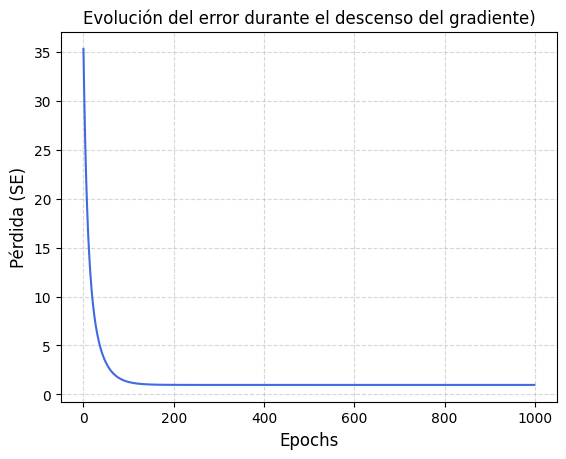

In [16]:
# Crea la gráfica aquí
plt.plot()
plt.plot(loss_history, color='royalblue')
plt.title('Evolución del error durante el descenso del gradiente)')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Pérdida (SE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

¿Cómo queda esta gráfica si modificas la tasa de aprendizaje o la inicialización de los parámetros?
Si aumenta la tasa de aprendizaje (eta) converge antes

# 2. Implementación con `scikit-learn`

Repetimos el mismo cálculo usando la implementación de regresión lineal de `scikit-learn`. 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Consulta la documentación para comprender la sintaxis.

In [17]:
# Expresa los atributos en forma matricial usando numpy
X = np.column_stack((x1, x2))

# Instancia el modelo
modelo = LinearRegression()        #con esto creamos un 'objeto' del tipo regresion lineal (como boton on)

# Ajusta el modelo
modelo.fit(X, y)                   #X los atributos, y las variables

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred_sklearn = modelo.predict(X)

¿Qué parámetros has obtenido? Consulta la documentación para averiguar cómo extraer estos valores.

In [22]:
# Imprime aquí los parámetros que has obtenido.
print(f"w1: {modelo.coef_[0]}, w2: {modelo.coef_[1]}, b: {modelo.intercept_}")

w1: 2.0016366835343447, w2: -1.5300518608140268, b: 3.996769712553814


# 3. Comparación de los resultados

¿Difieren mucho los valores de los parámetros que has encontrado?

Realiza una gráfica que muestre en el eje $x$ el valor real y en el otro el valor predicho manualmente.

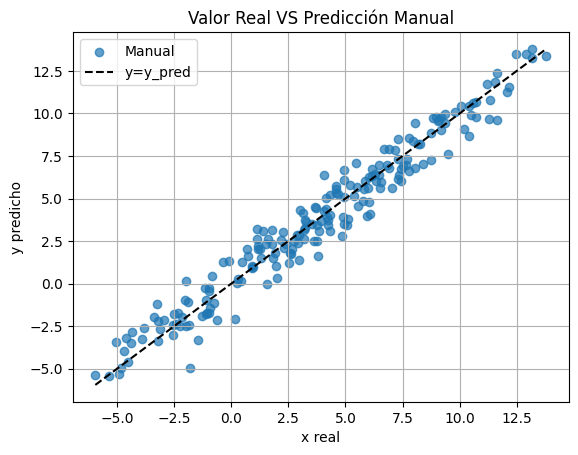

In [23]:
# Muestra la gráfica aquí
plt.scatter(y,y_pred, label = 'Manual', alpha= 0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--', label='y=y_pred')
plt.xlabel('x real')
plt.ylabel('y predicho')
plt.title('Valor Real VS Predicción Manual')
plt.legend()
plt.grid(True)
plt.show()


Realiza una gráfica que muestre en el eje $x$ el valor real y en el otro el valor predicho por `scikit-learn`.

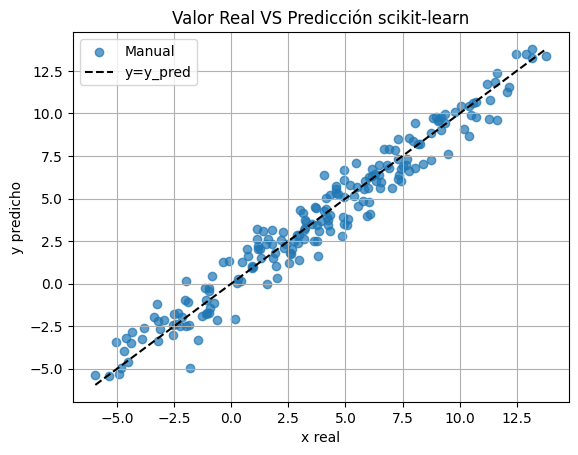

In [24]:
# Muestra la gráfica aquí
plt.scatter(y,y_pred_sklearn, label = 'Manual', alpha= 0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--', label='y=y_pred')
plt.xlabel('x real')
plt.ylabel('y predicho')
plt.title('Valor Real VS Predicción scikit-learn')
plt.legend()
plt.grid(True)
plt.show()


Calcula el error obtenido en ambos casos (MSE).

In [25]:
# Mostrar MSE final de ambos modelos
error_manual= mean_squared_error(y,y_pred)
error_sklearn = mean_squared_error(y,y_pred_sklearn)
print ('\n', 'El MSE de mi predicción manual es: ', error_manual)
print ('\n', 'El MSE de mi predicción con scikit-learn es: ', error_sklearn)


 El MSE de mi predicción manual es:  0.9680638834948755

 El MSE de mi predicción con scikit-learn es:  0.9680638834948755
